<a href="https://colab.research.google.com/github/JonathanSum/dlwpt-code_Colab/blob/master/p1ch4_1_image_happysugarlife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [2]:
!wget -O happysugarlife.7z https://www.dropbox.com/s/hii00hqj9s1s7m6/Happy%20Sugar%20Life.7z?dl=0

--2020-07-07 14:16:15--  https://www.dropbox.com/s/hii00hqj9s1s7m6/Happy%20Sugar%20Life.7z?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hii00hqj9s1s7m6/Happy%20Sugar%20Life.7z [following]
--2020-07-07 14:16:15--  https://www.dropbox.com/s/raw/hii00hqj9s1s7m6/Happy%20Sugar%20Life.7z
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6935041df1672aa6acdfd68b94.dl.dropboxusercontent.com/cd/0/inline/A7GYQf9JsgvhHnf9Q25j02mSiGYtmzFK16hroqkYAKAqxL_P78RWZiOz0-wXKAgPjBiUL_289a4qbIsk6nQNmcg_MTHUYKnlc7hv-ixrNJhw3zJ9WbucAb0_gG9D5oQXLfE/file# [following]
--2020-07-07 14:16:15--  https://uc6935041df1672aa6acdfd68b94.dl.dropboxusercontent.com/cd/0/inline/A7GYQf9JsgvhHnf9Q25j02mSiGYtmzFK16hroqkYAKAqxL_P78RWZiOz0-wXKAgPjBiUL_289a4q

In [3]:
!pip install pyunpack
!pip install patool

     |████████████████████████████████| 81kB 2.2MB/s 


In [4]:
!mkdir happy_sugar_life
!mv /content/happysugarlife.7z /content/happy_sugar_life


In [5]:
from pyunpack import Archive
Archive("/content/happy_sugar_life/happysugarlife.7z").extractall("/content/happy_sugar_life")

tar: happysugarlife.7z: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [51]:
import imageio

img_arr = imageio.imread('/content/happy_sugar_life/Happy Sugar Life/Satou/Satou_564 copy.png')
#img_arr = imageio.imread('/content/head3.png')
img_arr.shape

(100, 100, 4)

t is:  (100, 100, 4)


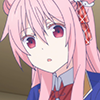

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F171638BF60>
(100, 100)


In [39]:
from PIL import Image
t = imageio.imread('/content/happy_sugar_life/Happy Sugar Life/Satou/Satou_564 copy.png')
print("t is: ", t.shape)
from torchvision import transforms
im = transforms.ToPILImage()(t).convert("RGB")
display(im)
print(im)
print(im.size)

In [53]:
out[2]

tensor([[150, 150,  ..., 137, 137],
        [150, 150,  ..., 137, 137],
        ...,
        [143, 143,  ..., 192, 190],
        [144, 144,  ..., 190, 190]], dtype=torch.uint8)

In [99]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)
out.shape

torch.Size([4, 100, 100])

In [102]:
data_dir = "/content/happy_sugar_life/Happy Sugar Life/Satou"
len_f = len([name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png'])
len_f

589

In [104]:
batch_size = len_f 
batch = torch.zeros(len_f, 4, 100, 100, dtype=torch.uint8)

In [106]:
out.shape, batch.shape

(torch.Size([4, 100, 100]), torch.Size([589, 4, 100, 100]))

In [107]:
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']
len(filenames)

589

In [109]:
import os


filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3] # <1>
    batch[i] = img_t

In [110]:
batch = batch.float()
batch /= 255.0

In [111]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

In [112]:
batch.shape

torch.Size([589, 4, 100, 100])

In [84]:
batch[:, 0].shape

torch.Size([3, 100, 100])

In [96]:
len(batch[0,0,1].shape)

1